<a href="https://colab.research.google.com/github/StefanoGiacomelli/e2panns/blob/main/AudioSet_EPANNs_EV_Preliminary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary Analysis

In [ ]:
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
files_path = '/content/drive/My Drive/Colab Notebooks/Tecnojest/preliminary_AudioSet_split/'

Mounted at /content/drive


# AudioSet Preliminary Partitioning

- **Positives**: `'Emergency vehicle'`
- **Negatives**:
    - Traffic: `'Traffic noise, roadway noise', 'Outside, urban or manmade'`
    - Vehicles: `'Car passing by', 'Motor vehicle (road)', 'Truck', 'Bus', 'Motorcycle', 'Bicycle', 'Skateboard'`
    - Alarms: `'Car alarm', 'Vehicle horn, car horn, honking', 'Siren', 'Civil defense siren', 'Alarm', 'Smoke detector, smoke alarm', 'Fire alarm'`

## Load files

In [ ]:
# Load AudioSet splits CSV files
positives_df = pd.read_csv(files_path + 'True_Positives.csv')
negatives_traffic_df = pd.read_csv(files_path + 'True_Negatives_Traffic.csv')
negatives_vehicles_df = pd.read_csv(files_path + 'True_Negatives_Vehicles.csv')
negatives_alarms_df = pd.read_csv(files_path + 'True_Negatives_Alarms.csv')

# Load HRF mapping CSV file
labels_df = pd.read_csv(files_path + 'class_labels_indices.csv')

## Count Unique Labels

In [ ]:
def count_unique_labels(df, label_column):
    all_labels = set(label for labels in df[label_column].apply(literal_eval) for label in labels)
    return len(all_labels), all_labels

# Compute the number of unique labels for each dataset
num_labels_positives, unique_labels_positives = count_unique_labels(positives_df, 'positive_labels')
num_labels_traffic, unique_labels_traffic = count_unique_labels(negatives_traffic_df, 'positive_labels')
num_labels_vehicles, unique_labels_vehicles = count_unique_labels(negatives_vehicles_df, 'positive_labels')
num_labels_alarms, unique_labels_alarms = count_unique_labels(negatives_alarms_df, 'positive_labels')

# Print results
print(f"POSITIVES dataset: {positives_df.shape[0]} samples")
print(f"POSITIVES dataset: : {num_labels_positives} unique labels")
print()
print(f"NEGATIVES - 'Traffic' dataset: {negatives_traffic_df.shape[0]} samples")
print(f"NEGATIVES - 'Traffic' dataset: {num_labels_traffic} unique labels")
print()
print(f"NEGATIVES - 'Vehicles' dataset: {negatives_vehicles_df.shape[0]} samples")
print(f"NEGATIVES - 'Vehicles' dataset: {num_labels_vehicles} unique labels")
print()
print(f"NEGATIVES - 'Alarms' dataset: {negatives_alarms_df.shape[0]} samples")
print(f"NEGATIVES - 'Alarms' dataset: {num_labels_alarms} unique labels")

POSITIVES dataset: 5730 samples
POSITIVES dataset: : 74 unique labels

NEGATIVES - 'Traffic' dataset: 35769 samples
NEGATIVES - 'Traffic' dataset: 386 unique labels

NEGATIVES - 'Vehicles' dataset: 38305 samples
NEGATIVES - 'Vehicles' dataset: 309 unique labels

NEGATIVES - 'Alarms' dataset: 10815 samples
NEGATIVES - 'Alarms' dataset: 154 unique labels


## Emergency Vehicles Labels

Positives Label Frequency Distribution:
                       display_name  count
2                 Emergency vehicle   5730
3                             Siren   3938
6   Fire engine, fire truck (siren)   2223
4                Police car (siren)   2136
11                          Vehicle   1923
0                 Ambulance (siren)   1647
18                            Truck    912
21                           Speech    588
19             Motor vehicle (road)    436
13                              Car    321
26                           Engine    136
1                         Car alarm    114
22        Outside, urban or manmade    108
24     Accelerating, revving, vroom     93
29                            Music     88
25    Medium engine (mid frequency)     81
12     Traffic noise, roadway noise     66
28     Heavy engine (low frequency)     39
5               Civil defense siren     30
33             Air horn, truck horn     21
15                             Fire     20
14  Vehicle ho

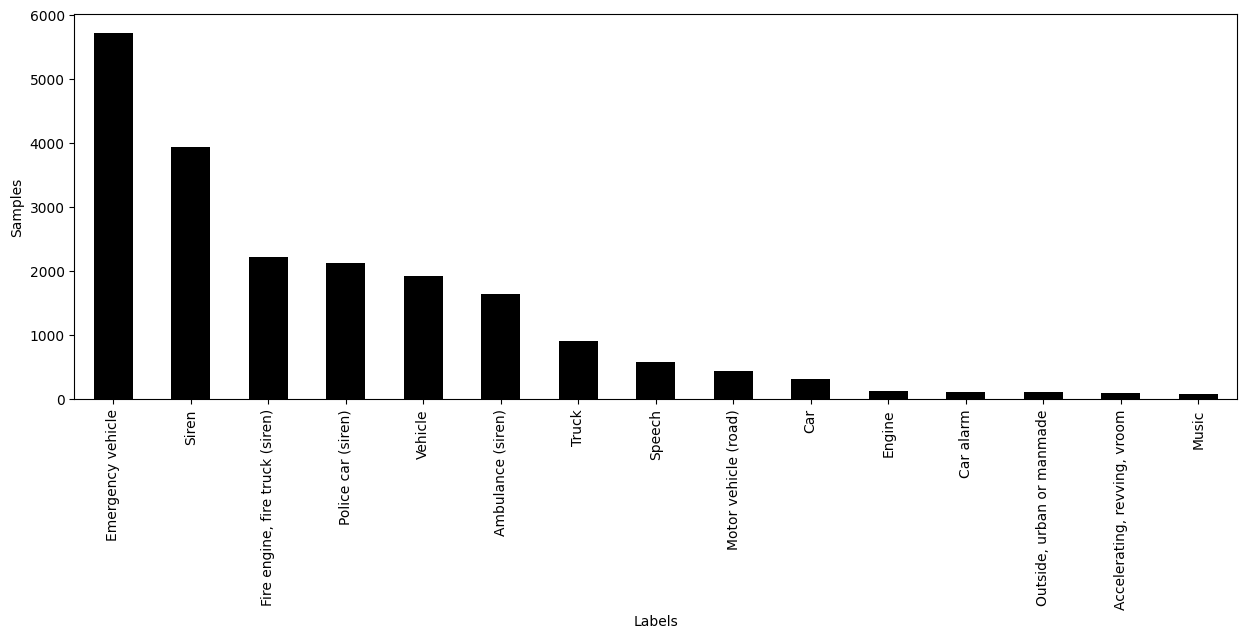

In [ ]:
# Initialize a dictionary to count label frequencies
label_count = {}

# Iterate over the 'positive_labels' column and count label occurrences
for labels in positives_df['positive_labels']:
    # Convert the string representation of the list to an actual list
    label_list = literal_eval(labels)
    for label in label_list:
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1

# Convert the label_count dictionary to a DataFrame
label_distribution = pd.DataFrame.from_dict(label_count, orient='index', columns=['count'])

# Merge with the label mapping to get display names
label_distribution.reset_index(inplace=True)
label_distribution.columns = ['mid', 'count']
label_distribution = label_distribution.merge(labels_df, on='mid', how='left')

# Sort the distribution by count for better readability
label_distribution.sort_values(by='count', ascending=False, inplace=True)

# Display the distribution in the console
print("Positives Label Frequency Distribution:")
print(label_distribution[['display_name', 'count']].head(30))
print()

# Create the bar plot for the top 15 labels
ax = label_distribution[['display_name', 'count']].head(15).set_index('display_name') \
    .plot(kind='bar', figsize=(15, 5), legend=False, color='black')

# Set the x-axis and y-axis labels
ax.set_xlabel("Labels")
ax.set_ylabel("Samples")
ax.set_title("")  # Remove the title

# Save the figure as a high quality PNG file at 600 dpi
plt.savefig("positives_label_frequency_distribution.png", dpi=600, bbox_inches='tight')
plt.show()

## Negatives Labels

In [ ]:
# --- Negatives Traffic Distribution ---
label_count_traffic = {}
for labels in negatives_traffic_df['positive_labels']:
    # Convert the string representation of the list to an actual list
    label_list = literal_eval(labels)
    for label in label_list:
        if label in label_count_traffic:
            label_count_traffic[label] += 1
        else:
            label_count_traffic[label] = 1

# Convert the dictionary to a DataFrame and merge with labels_df for display names
traffic_distribution = pd.DataFrame.from_dict(label_count_traffic, orient='index', columns=['count'])
traffic_distribution.reset_index(inplace=True)
traffic_distribution.columns = ['mid', 'count']
traffic_distribution = traffic_distribution.merge(labels_df, on='mid', how='left')
traffic_distribution.sort_values(by='count', ascending=False, inplace=True)

print("Negatives Traffic Label Frequency Distribution:")
print(traffic_distribution[['display_name', 'count']].head(30))
print()

# --- Negatives Vehicles Distribution ---
label_count_vehicles = {}
for labels in negatives_vehicles_df['positive_labels']:
    # Convert the string representation of the list to an actual list
    label_list = literal_eval(labels)
    for label in label_list:
        if label in label_count_vehicles:
            label_count_vehicles[label] += 1
        else:
            label_count_vehicles[label] = 1

# Convert the dictionary to a DataFrame and merge with labels_df for display names
vehicles_distribution = pd.DataFrame.from_dict(label_count_vehicles, orient='index', columns=['count'])
vehicles_distribution.reset_index(inplace=True)
vehicles_distribution.columns = ['mid', 'count']
vehicles_distribution = vehicles_distribution.merge(labels_df, on='mid', how='left')
vehicles_distribution.sort_values(by='count', ascending=False, inplace=True)

print("Negatives Vehicles Label Frequency Distribution:")
print(vehicles_distribution[['display_name', 'count']].head(30))
print()

# --- Negatives Alarms Distribution ---
label_count_alarms = {}
for labels in negatives_alarms_df['positive_labels']:
    # Convert the string representation of the list to an actual list
    label_list = literal_eval(labels)
    for label in label_list:
        if label in label_count_alarms:
            label_count_alarms[label] += 1
        else:
            label_count_alarms[label] = 1

# Convert the dictionary to a DataFrame and merge with labels_df for display names
alarms_distribution = pd.DataFrame.from_dict(label_count_alarms, orient='index', columns=['count'])
alarms_distribution.reset_index(inplace=True)
alarms_distribution.columns = ['mid', 'count']
alarms_distribution = alarms_distribution.merge(labels_df, on='mid', how='left')
alarms_distribution.sort_values(by='count', ascending=False, inplace=True)

print("Negatives Alarms Label Frequency Distribution:")
print(alarms_distribution[['display_name', 'count']].head(30))
print()

Negatives Traffic Label Frequency Distribution:
                            display_name  count
3              Outside, urban or manmade  34235
1                                 Speech  21878
15                               Vehicle  11818
13                                 Music   7655
19                                   Car   5344
9                                    Run   2053
16          Traffic noise, roadway noise   1628
113                                Train   1382
24                            Motorcycle   1135
20       Vehicle horn, car horn, honking   1039
35                 Race car, auto racing    969
37                                 Truck    922
95                                  Bird    893
180                         Pigeon, dove    778
18                  Motor vehicle (road)    719
111            Railroad car, train wagon    656
157                                Crowd    567
31                                   Bus    481
30                                Animal

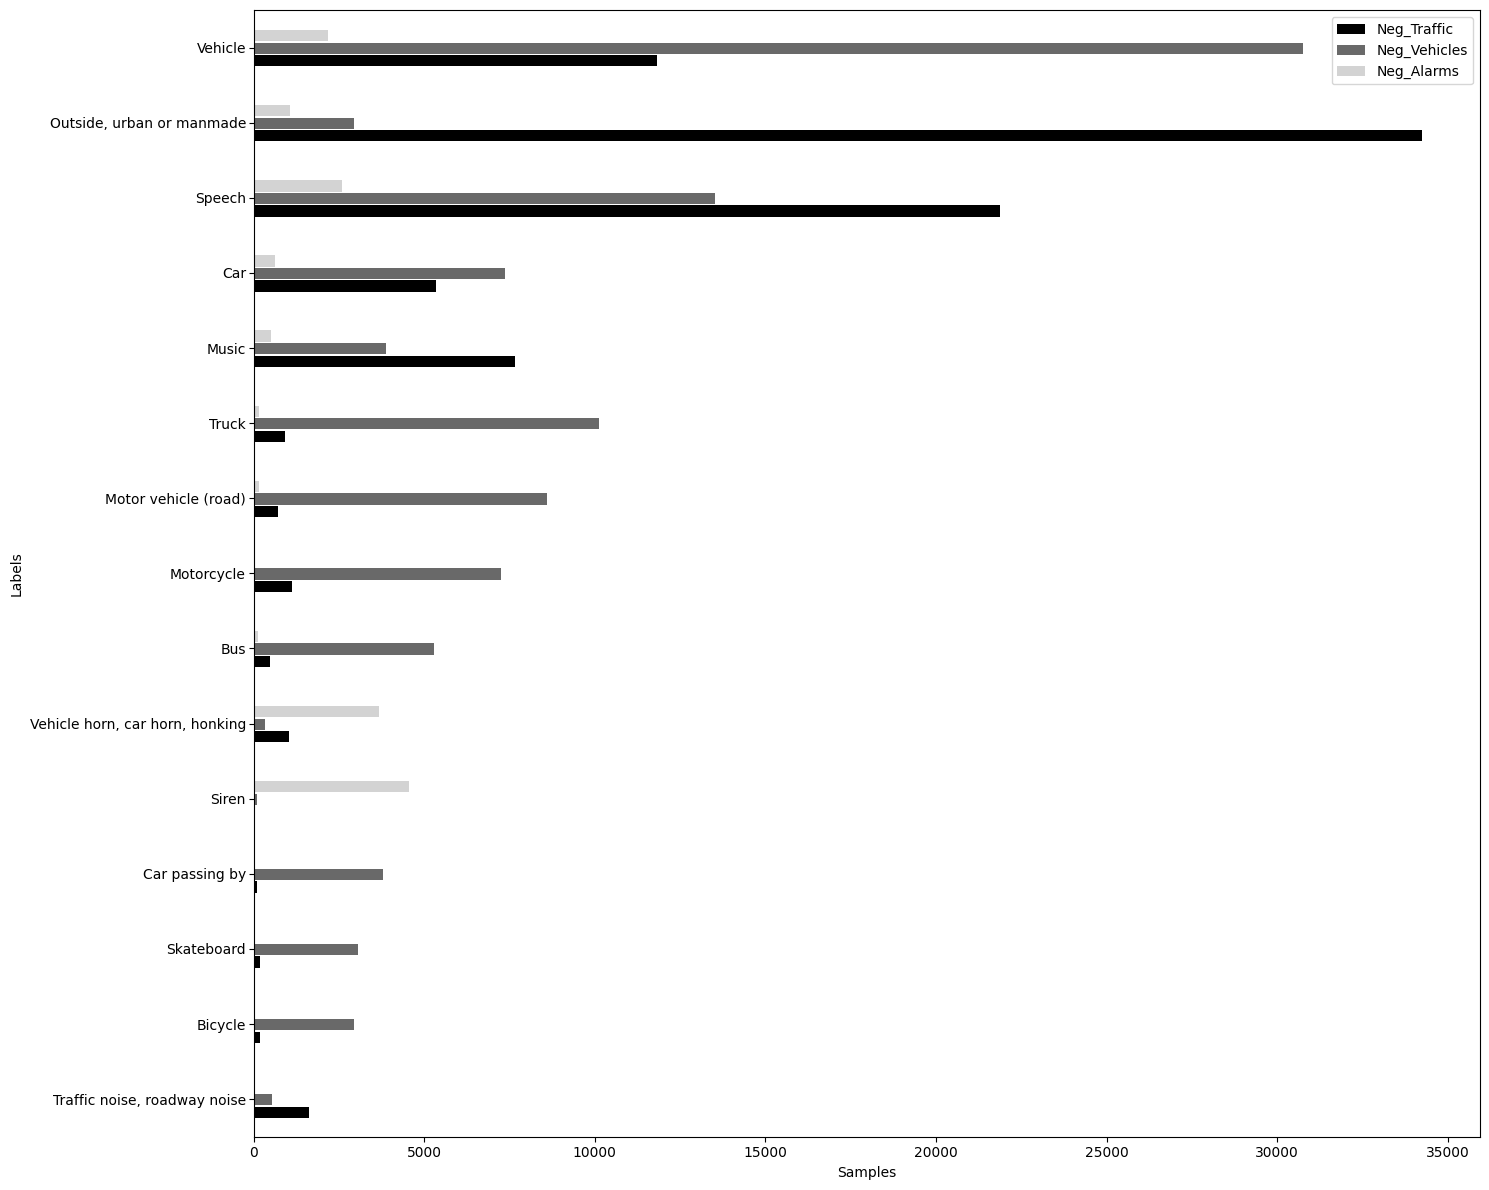

In [ ]:
# Set the number of top labels to display
top_n = 15

def compute_label_distribution(df, column_name):
    """
    Compute the label frequency distribution for a given DataFrame and column.
    The column is expected to contain string representations of lists.
    """
    count_dict = {}
    for labels in df[column_name]:
        # Convert the string representation of the list to an actual list
        label_list = literal_eval(labels)
        for label in label_list:
            count_dict[label] = count_dict.get(label, 0) + 1
    dist_df = pd.DataFrame.from_dict(count_dict, orient='index', columns=['count'])
    dist_df.reset_index(inplace=True)
    dist_df.columns = ['mid', 'count']
    dist_df = dist_df.merge(labels_df, on='mid', how='left')
    return dist_df

# Compute distributions for each negatives dataframe
traffic_dist = compute_label_distribution(negatives_traffic_df, 'positive_labels')
vehicles_dist = compute_label_distribution(negatives_vehicles_df, 'positive_labels')
alarms_dist   = compute_label_distribution(negatives_alarms_df, 'positive_labels')

# Rename the 'count' columns for clarity
traffic_dist.rename(columns={'count': 'traffic_count'}, inplace=True)
vehicles_dist.rename(columns={'count': 'vehicles_count'}, inplace=True)
alarms_dist.rename(columns={'count': 'alarms_count'}, inplace=True)

# Merge the three distributions on the label identifier ('mid')
merged_df = traffic_dist.merge(vehicles_dist[['mid', 'vehicles_count']], on='mid', how='outer')
merged_df = merged_df.merge(alarms_dist[['mid', 'alarms_count']], on='mid', how='outer')

# Replace any missing counts with 0
merged_df[['traffic_count', 'vehicles_count', 'alarms_count']] = merged_df[['traffic_count', 'vehicles_count', 'alarms_count']].fillna(0)

# Ensure a display name is available; if not, fallback to the label id (mid)
merged_df['display_name'] = merged_df['display_name'].fillna(merged_df['mid'])

# Compute the total count for each label (across all negatives sources)
merged_df['total_count'] = merged_df['traffic_count'] + merged_df['vehicles_count'] + merged_df['alarms_count']

# Select the top N labels based on total count
top_labels_df = merged_df.sort_values(by='total_count', ascending=False).head(top_n)

# For a horizontal bar chart, sort in ascending order so that the highest count appears at the top
top_labels_df = top_labels_df.sort_values(by='total_count', ascending=True)

# Set 'display_name' as the index for plotting
top_labels_df.set_index('display_name', inplace=True)

# Create a horizontal grouped bar chart with specified grayscale colors:
# Neg_Traffic = black, Neg_Vehicles = dark grey, Neg_Alarms = light grey.
ax = top_labels_df[['traffic_count', 'vehicles_count', 'alarms_count']] \
    .plot(kind='barh', figsize=(15, 12), color=['black', 'dimgray', 'lightgrey'])

# Make bars a bit thicker by adjusting the height of each bar
for container in ax.containers:
    for bar in container:
         bar.set_height(0.15)

# Place the legend in the best location without covering the plot bars and rename legend elements
ax.legend(['Neg_Traffic', 'Neg_Vehicles', 'Neg_Alarms'], loc='best')

# Set the x-axis and y-axis labels
ax.set_xlabel("Samples")
ax.set_ylabel("Labels")

# Adjust the y-axis tick parameters to reduce padding and font size (making labels appear tighter)
ax.tick_params(axis='y', which='major', pad=2, labelsize=10)

ax.set_title("")  # Remove the title

# Apply tight_layout to minimize extra spacing
plt.tight_layout()

# Save the figure as a high-quality PNG file at 600 dpi
plt.savefig("negatives_label_frequency_distribution.png", dpi=600, bbox_inches='tight')
plt.show()

## Co-occurrence Matrices (per split)

In [ ]:
mid_to_display_name = dict(zip(labels_df['mid'], labels_df['display_name']))

# Number of rows to display
N_com = 20

In [ ]:
# Function to compute the co-occurrence matrix
def compute_co_occurrence_matrix(df, label_column):
    # Get a sorted list of unique labels from the specified column
    unique_labels = sorted(set(label for labels in df[label_column].apply(literal_eval) for label in labels))
    # Initialize a square DataFrame with zeros
    co_occurrence_matrix = pd.DataFrame(0, index=unique_labels, columns=unique_labels)
    # Iterate over each list of labels and count co-occurrences
    for labels in df[label_column].apply(literal_eval):
        for label1 in labels:
            for label2 in labels:
                co_occurrence_matrix.loc[label1, label2] += 1
    return co_occurrence_matrix

# Replace label codes with display names
def replace_label_codes_with_names(matrix, label_mapping):
    matrix.index = matrix.index.map(label_mapping)
    matrix.columns = matrix.columns.map(label_mapping)
    matrix.fillna(0, inplace=True)  # Ensure no NaN values if mapping fails
    return matrix

# Function to plot the co-occurrence matrix as a heatmap in greyscale
def plot_co_occurrence_matrix(matrix, title, max_labels=20, font_size=8, cell_aspect_ratio=0.5,
                              figsize=(15, 15), cmap='Greys', use_log_scale=False, save_path=None):
    # Sort the matrix by the sum of occurrences for a compact layout
    sorted_labels = matrix.sum(axis=1).sort_values(ascending=False).index
    matrix = matrix.loc[sorted_labels, sorted_labels]

    # Set the plot size and create the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matrix.head(max_labels).iloc[:, :max_labels],
                annot=True,
                fmt="d",
                cmap=cmap,
                cbar=True,
                annot_kws={"size": font_size},
                linewidths=0.5,
                square=True,
                norm=LogNorm() if use_log_scale else None)

    # Remove title from the figure
    plt.title("")
    plt.xlabel('Labels')
    plt.ylabel('Labels')
    plt.xticks(rotation=45, ha='right', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.tight_layout()

    # Save the plot if a save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()

# Compute co-occurrence matrices for different datasets
positives_co_matrix = compute_co_occurrence_matrix(positives_df, 'positive_labels')
negatives_traffic_co_matrix = compute_co_occurrence_matrix(negatives_traffic_df, 'positive_labels')
negatives_vehicles_co_matrix = compute_co_occurrence_matrix(negatives_vehicles_df, 'positive_labels')
negatives_alarms_co_matrix = compute_co_occurrence_matrix(negatives_alarms_df, 'positive_labels')

# Replace label codes with display names in the matrices using the mapping dictionary (mid_to_display_name)
positives_co_matrix_named = replace_label_codes_with_names(positives_co_matrix, mid_to_display_name)
negatives_traffic_co_matrix_named = replace_label_codes_with_names(negatives_traffic_co_matrix, mid_to_display_name)
negatives_vehicles_co_matrix_named = replace_label_codes_with_names(negatives_vehicles_co_matrix, mid_to_display_name)
negatives_alarms_co_matrix_named = replace_label_codes_with_names(negatives_alarms_co_matrix, mid_to_display_name)

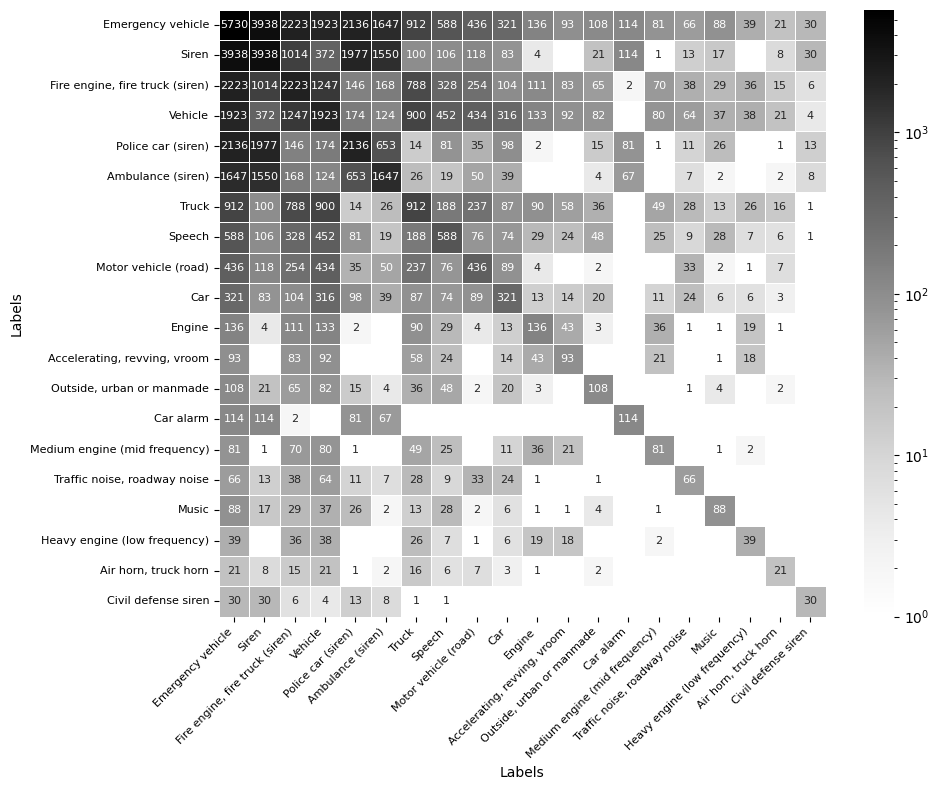

In [ ]:
plot_co_occurrence_matrix(positives_co_matrix_named,
                          f'Co-occurrence Matrix for Positives (Top {N_com})',
                          max_labels=N_com,
                          font_size=8,
                          cell_aspect_ratio=0.7,                                # Adjust this value to change cell size ratio
                          figsize=(10, 8),                                      # Adjust this to see the effect on cell size
                          cmap='Greys',                                         # Choose a custom color map
                          use_log_scale=True,                                   # Apply log scale to the color gradient
                          save_path='Positives_Co-occurences')

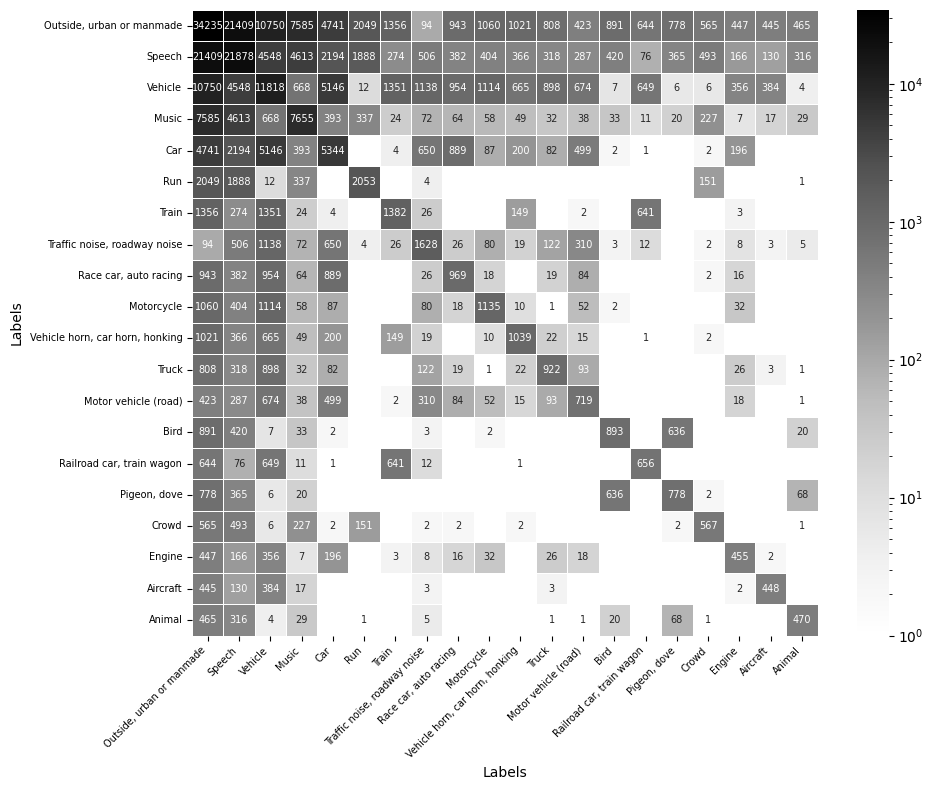

In [ ]:
plot_co_occurrence_matrix(negatives_traffic_co_matrix_named,
                          f'Co-occurrence Matrix for Negatives - "Traffic" (Top {N_com})',
                          max_labels=N_com,
                          font_size=7,
                          cell_aspect_ratio=0.9,                                # Adjust this value to change cell size ratio
                          figsize=(10, 8),                                      # Adjust this to see the effect on cell size
                          cmap='Greys',                                         # Choose a custom color map
                          use_log_scale=True,                                   # Apply log scale to the color gradient
                          save_path='Neg_Traffic_Co-occurences')

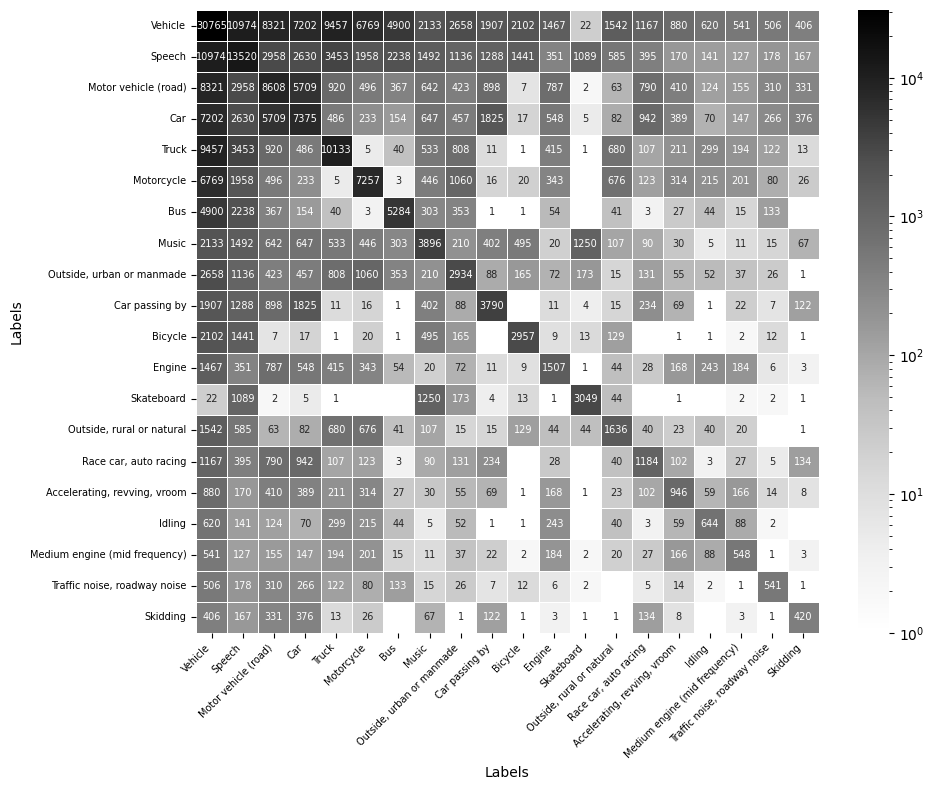

In [ ]:
plot_co_occurrence_matrix(negatives_vehicles_co_matrix_named,
                          f'Co-occurrence Matrix for Negatives - "Vehicles" (Top {N_com})',
                          max_labels=N_com,
                          font_size=7,
                          cell_aspect_ratio=0.9,                                # Adjust this value to change cell size ratio
                          figsize=(10, 8),                                      # Adjust this to see the effect on cell size
                          cmap='Greys',                                         # Choose a custom color map
                          use_log_scale=True,                                   # Apply log scale to the color gradient
                          save_path='Neg_Vehicles_Co-occurences')

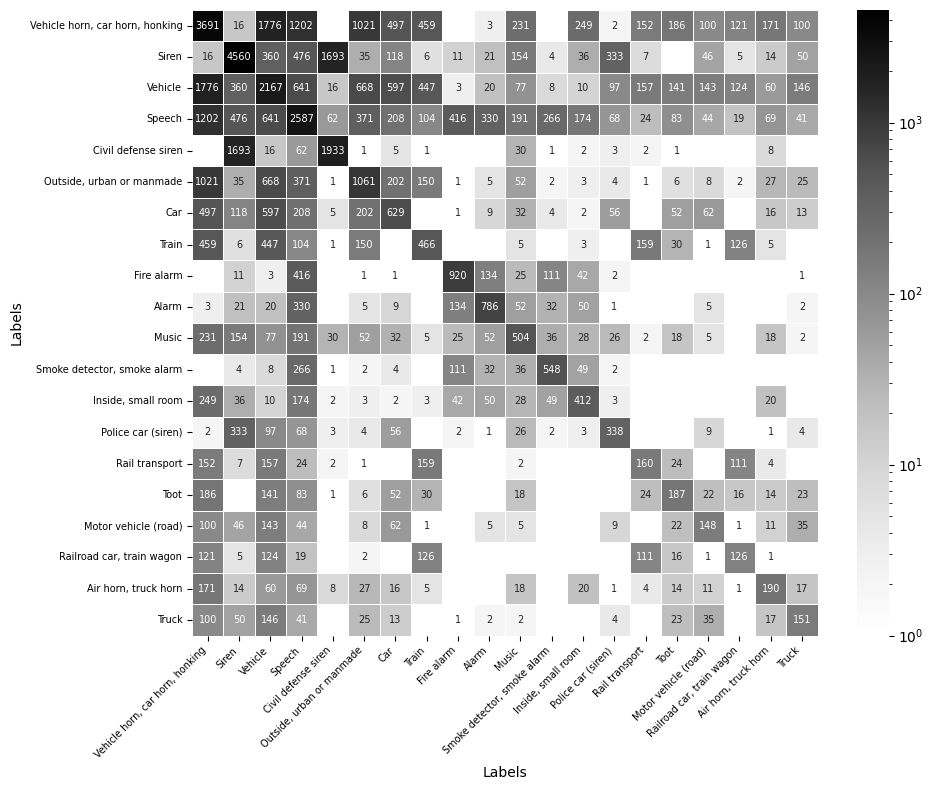

In [ ]:
plot_co_occurrence_matrix(negatives_alarms_co_matrix_named,
                          f'Co-occurrence Matrix for Negatives - "Alarms" (Top {N_com})',
                          max_labels=N_com,
                          font_size=7,
                          cell_aspect_ratio=0.9,                                # Adjust this value to change cell size ratio
                          figsize=(10, 8),                                      # Adjust this to see the effect on cell size
                          cmap='Greys',                                         # Choose a custom color map
                          use_log_scale=True,                                   # Apply log scale to the color gradient
                          save_path='Neg_Alarms_Co-occurences')

In [ ]:
# Optionally, save the co-occurrence matrices to CSV for further analysis
# positives_co_matrix.to_csv('positives_co_occurrence_matrix.csv')
# negatives_traffic_co_matrix.to_csv('negatives_traffic_co_occurrence_matrix.csv')
# negatives_vehicles_co_matrix.to_csv('negatives_vehicles_co_occurrence_matrix.csv')
# negatives_alarms_co_matrix.to_csv('negatives_alarms_co_occurrence_matrix.csv')

# E-PANNs Preliminary Inference Analysis

In [ ]:
# AudioSet Classes
num_classes = 527

In [ ]:
def plot_class_distributions(probits_df, class_mapping_df, class_labels, bin_size=0.05,
                             zoom_min=0.0, zoom_max=1.0, save_as_vector=False,
                             file_name="class_distributions", title=''):
    """
    Plots the distributions of probabilities for the specified classes in the given dataset.
    The classes to plot are provided in human-readable format (their display names), which are mapped
    to the appropriate column indices based on the provided mapping DataFrame. The histogram is plotted
    in greyscale and the plot is saved as a high-quality PNG (600 dpi) and as an SVG if requested.

    Args:
        probits_df (pd.DataFrame): DataFrame of probabilities (num_samples x num_classes).
        class_mapping_df (pd.DataFrame): Mapping DataFrame with columns: "index", "mid", "display_name".
        class_labels (list): List of human-readable class labels (display names) to plot.
        bin_size (float): Width of histogram bins.
        zoom_min (float): Minimum probability to display.
        zoom_max (float): Maximum probability to display.
        save_as_vector (bool): If True, saves the plot as both PNG (600 dpi) and SVG.
        file_name (str): Base file name (without extension) for saving the plot.
        title (str): Additional title text to include in the plot.

    Returns:
        None: The function prints the input softmax matrix (shape and first few rows)
              and displays (and optionally saves) the histogram plot.
    """
    # Print the input softmax matrix info
    print("Shape of the softmax matrix:", probits_df.shape)
    print(probits_df.head())
    print()

    # Create a mapping from display name to class index (ensure the index is an integer)
    name_to_index = {row['display_name']: int(row['index']) for _, row in class_mapping_df.iterrows()}

    # Map the provided human-readable labels to their corresponding column indices
    class_indices = []
    for label in class_labels:
        if label not in name_to_index:
            raise ValueError(f"Class label '{label}' not found in the mapping dataframe.")
        class_indices.append(name_to_index[label])

    # Generate greyscale colors for the number of classes provided
    num_classes = len(class_labels)
    if num_classes > 1:
        # Values range from 0 (black) to 0.8 (light grey)
        colors = [plt.cm.Greys(0.0 + 0.8 * (i/(num_classes-1))) for i in range(num_classes)]
    else:
        colors = [plt.cm.Greys(0.5)]

    # Prepare the figure
    plt.figure(figsize=(14, 7))
    # Compute bar_width such that the total width across classes is less than the bin size.
    bar_width = bin_size / num_classes

    # Loop over the specified classes and plot their histograms
    for i, class_index in enumerate(class_indices):
        # Extract the probability column for the given class index
        class_probabilities = probits_df.iloc[:, class_index]
        class_name = class_labels[i]

        # Bin the probabilities using numpy histogram
        bins = np.arange(0, 1 + bin_size, bin_size)
        hist, bin_edges = np.histogram(class_probabilities, bins=bins)

        # Select bins within the zoom range
        zoom_indices = (bin_edges[:-1] >= zoom_min) & (bin_edges[:-1] < zoom_max)
        zoomed_bin_edges = bin_edges[:-1][zoom_indices]
        zoomed_hist = hist[zoom_indices]

        # Compute the total frequency for the displayed range
        integral_sum = np.sum(zoomed_hist)

        # For centering: the center of a bin is at bin_edge + bin_size/2.
        # For multiple classes, compute an offset: offsets range from -half_total_offset to +half_total_offset.
        offsets = (i - (num_classes - 1)/2) * bar_width
        bar_centers = zoomed_bin_edges + bin_size/2 + offsets

        # Plot the histogram as bars (in greyscale) with centered alignment
        plt.bar(bar_centers,
                zoomed_hist,
                width=bar_width,
                align='center',
                edgecolor='black',
                alpha=0.6,
                label=f'{class_name} (Total: {integral_sum})',
                color=colors[i])

    # Set x-ticks to be at the center of each bin
    tick_positions = zoomed_bin_edges + bin_size/2

    # Formatting the plot
    plt.xlabel('Probability Range')
    plt.ylabel('Frequency')
    plt.title("")
    plt.xticks(tick_positions, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend()

    # Save the plot if requested (saves both PNG and SVG)
    if save_as_vector:
        plt.savefig(file_name + ".png", format='png', dpi=600, bbox_inches='tight')
        plt.savefig(file_name + ".svg", format='svg', bbox_inches='tight')

    # Display the plot
    plt.show()

## Emergency Vehicles Probabilities

Shape of the softmax matrix: (4715, 527)
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7  \
0  0.008076  0.000094  0.000037  0.000116  0.000023  0.000050  0.000013   
1  0.006031  0.000024  0.000012  0.000021  0.000009  0.000013  0.000005   
2  0.009948  0.000080  0.000054  0.000137  0.000016  0.000022  0.000050   
3  0.002166  0.000014  0.000016  0.000055  0.000010  0.000006  0.000014   
4  0.009094  0.000046  0.000036  0.000025  0.000017  0.000029  0.000004   

    Class_8   Class_9  Class_10  ...  Class_518     Class_519  Class_520  \
0  0.000017  0.000048  0.000071  ...   0.000101  2.691425e-05   0.000315   
1  0.000006  0.000015  0.000027  ...   0.000009  3.365968e-06   0.000167   
2  0.000005  0.000008  0.000009  ...   0.000013  2.650913e-06   0.000076   
3  0.000003  0.000024  0.000016  ...   0.000004  6.234955e-07   0.000014   
4  0.000014  0.000021  0.000011  ...   0.000017  7.420928e-06   0.000109   

   Class_521  Class_522  Class_523  Class_524  Clas

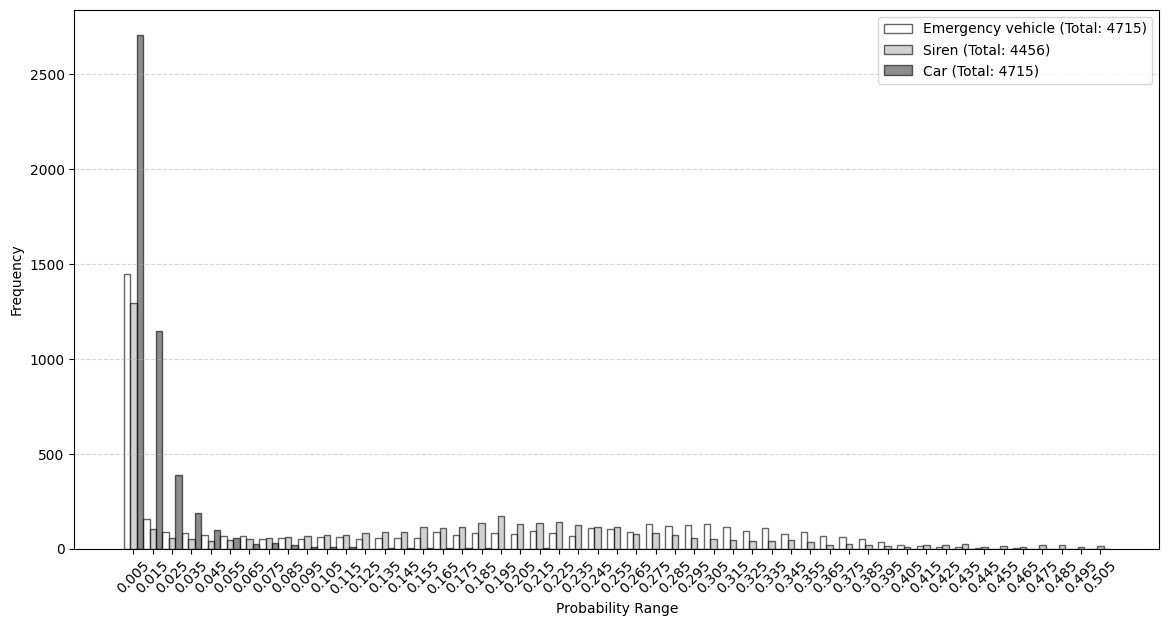

In [ ]:
# Load model outputs & HRF mapping CSV
data = np.load(files_path + "probs_Emergency_Vehicle.npz")
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

# Extract the "softmaxed" (probabilities) matrix from the loaded data
softmax_matrix = data["logits"]

# Convert the matrix to a pandas DataFrame with columns named "Class_1", "Class_2", etc.
softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])

# Call the plotting function using human-readable class labels.
plot_class_distributions(probits_df=softmax_df,
                         class_mapping_df=classes_df,
                         class_labels=['Emergency vehicle', 'Siren', 'Car'],
                         bin_size=0.01,
                         zoom_min=0.0,
                         zoom_max=0.51,
                         save_as_vector=True,
                         file_name="Positives_Inference_Distribution",
                         title="Positives")

## Traffic Probabilities

Shape of the softmax matrix: (4855, 527)
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7  \
0  0.025668  0.000136  0.000040  0.000050  0.000044  0.000122  0.000010   
1  0.350893  0.001882  0.000213  0.000233  0.000475  0.000730  0.000013   
2  0.745205  0.014323  0.000271  0.000045  0.002829  0.007403  0.000003   
3  0.010907  0.000097  0.000078  0.000033  0.000027  0.000058  0.000007   
4  0.016440  0.000038  0.000015  0.000018  0.000014  0.000021  0.000003   

    Class_8   Class_9  Class_10  ...  Class_518  Class_519  Class_520  \
0  0.000050  0.000056  0.000057  ...   0.000058   0.000054   0.000442   
1  0.000653  0.000030  0.000045  ...   0.000012   0.000110   0.000304   
2  0.001308  0.000132  0.000035  ...   0.000031   0.000047   0.000106   
3  0.000064  0.000045  0.000057  ...   0.000118   0.000042   0.000568   
4  0.000012  0.000006  0.000010  ...   0.000023   0.000016   0.000280   

   Class_521  Class_522  Class_523  Class_524  Class_525  Class_526  

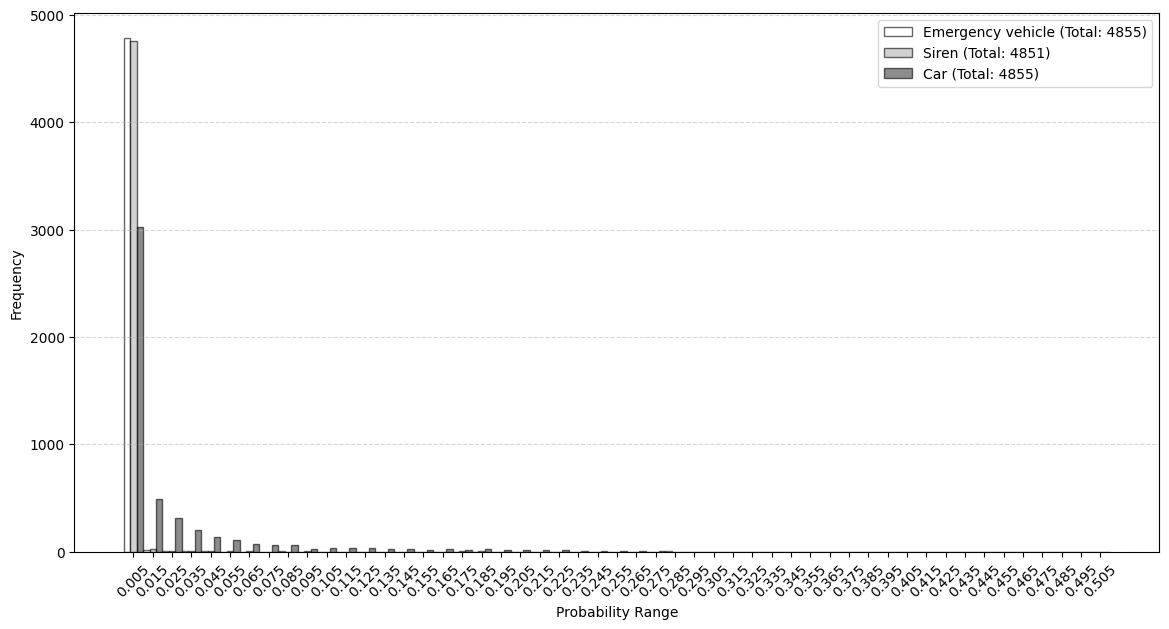

In [ ]:
data = np.load(files_path + "probs_Traffic.npz")
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

softmax_matrix = data["logits"]

softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])

plot_class_distributions(probits_df=softmax_df,
                         class_mapping_df=classes_df,
                         class_labels=['Emergency vehicle', 'Siren', 'Car'],
                         bin_size=0.01,
                         zoom_min=0.0,
                         zoom_max=0.51,
                         save_as_vector=True,
                         file_name="Neg_Traffic_0-05_Inference_Distribution",
                         title="Negatives")

Shape of the softmax matrix: (4855, 527)
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7  \
0  0.025668  0.000136  0.000040  0.000050  0.000044  0.000122  0.000010   
1  0.350893  0.001882  0.000213  0.000233  0.000475  0.000730  0.000013   
2  0.745205  0.014323  0.000271  0.000045  0.002829  0.007403  0.000003   
3  0.010907  0.000097  0.000078  0.000033  0.000027  0.000058  0.000007   
4  0.016440  0.000038  0.000015  0.000018  0.000014  0.000021  0.000003   

    Class_8   Class_9  Class_10  ...  Class_518  Class_519  Class_520  \
0  0.000050  0.000056  0.000057  ...   0.000058   0.000054   0.000442   
1  0.000653  0.000030  0.000045  ...   0.000012   0.000110   0.000304   
2  0.001308  0.000132  0.000035  ...   0.000031   0.000047   0.000106   
3  0.000064  0.000045  0.000057  ...   0.000118   0.000042   0.000568   
4  0.000012  0.000006  0.000010  ...   0.000023   0.000016   0.000280   

   Class_521  Class_522  Class_523  Class_524  Class_525  Class_526  

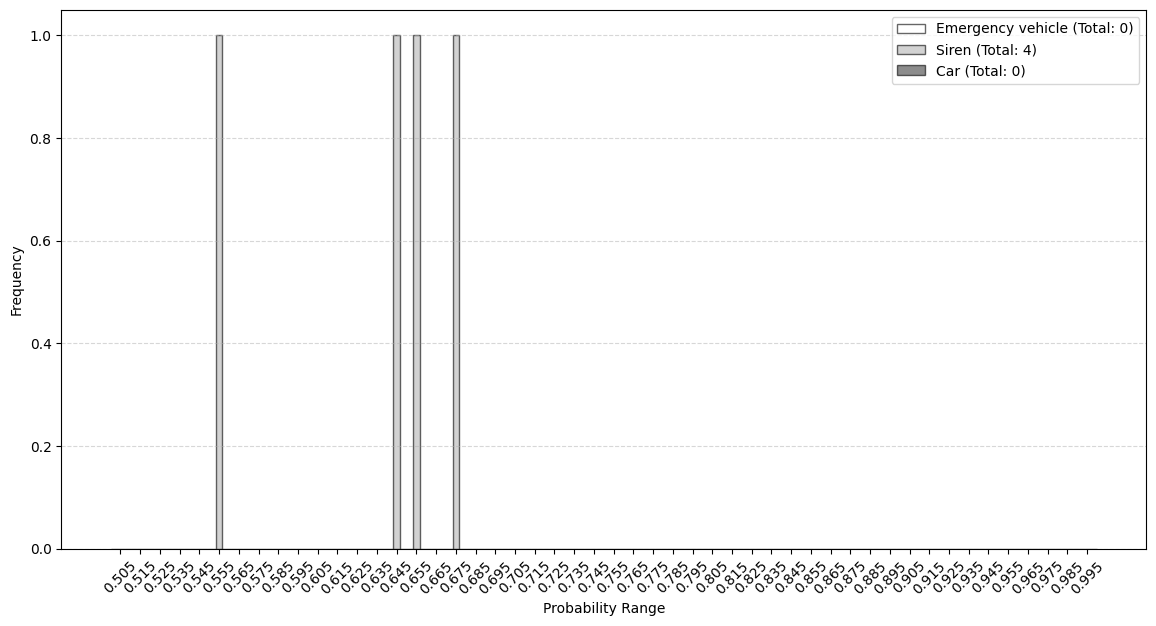

In [ ]:
plot_class_distributions(probits_df=softmax_df,
                         class_mapping_df=classes_df,
                         class_labels=['Emergency vehicle', 'Siren', 'Car'],
                         bin_size=0.01,
                         zoom_min=0.50,
                         zoom_max=1.01,
                         save_as_vector=True,
                         file_name="Neg_Traffic_05-10_Inference_Distribution",
                         title="Negatives")

## Vehicles Probabilities

Shape of the softmax matrix: (4985, 527)
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7  \
0  0.048486  0.000314  0.000205  0.000937  0.000073  0.000129  0.000106   
1  0.009228  0.000244  0.000075  0.000073  0.000072  0.000134  0.000020   
2  0.759897  0.017221  0.000399  0.000047  0.004205  0.008238  0.000006   
3  0.003175  0.000163  0.000059  0.000010  0.000024  0.000137  0.000001   
4  0.606485  0.001115  0.000135  0.000294  0.000239  0.000390  0.000054   

    Class_8   Class_9  Class_10  ...  Class_518  Class_519  Class_520  \
0  0.000065  0.000252  0.000186  ...   0.000039   0.000050   0.002085   
1  0.000090  0.000069  0.000149  ...   0.000037   0.000034   0.002499   
2  0.003613  0.000142  0.000049  ...   0.000053   0.000065   0.000064   
3  0.000030  0.000074  0.000043  ...   0.000360   0.000041   0.000019   
4  0.000362  0.000026  0.000016  ...   0.000007   0.000023   0.000027   

   Class_521  Class_522  Class_523  Class_524  Class_525  Class_526  

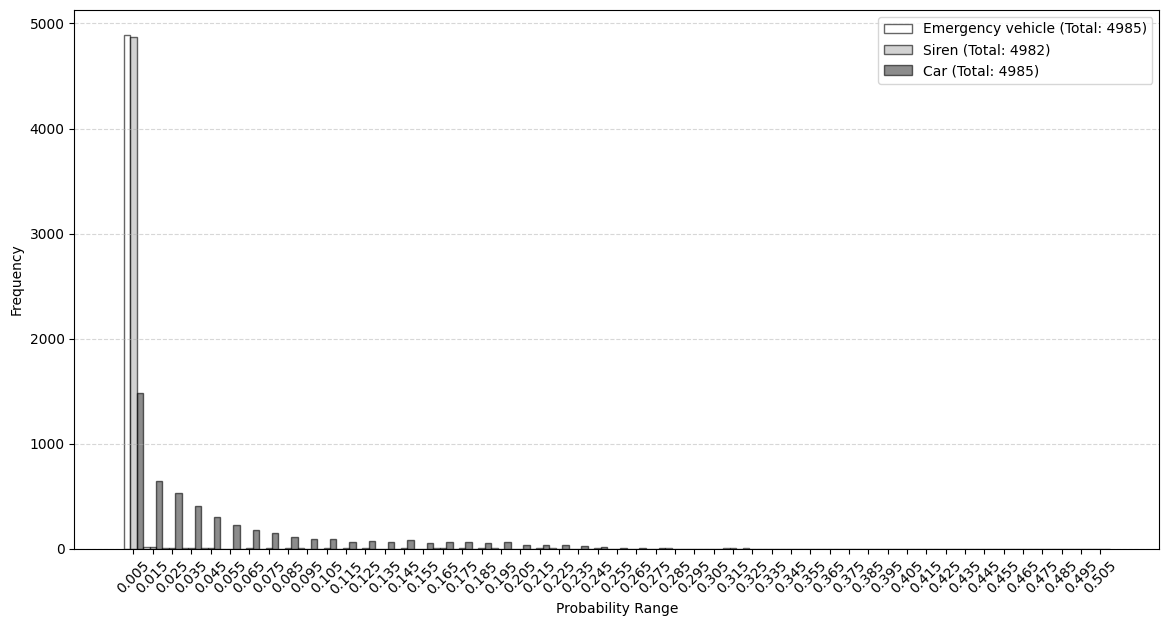

In [ ]:
data = np.load(files_path + "probs_Vehicles.npz")
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

softmax_matrix = data["logits"]

softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])

plot_class_distributions(probits_df=softmax_df,
                         class_mapping_df=classes_df,
                         class_labels=['Emergency vehicle', 'Siren', 'Car'],
                         bin_size=0.01,
                         zoom_min=0.0,
                         zoom_max=0.51,
                         save_as_vector=True,
                         file_name="Neg_Vehicles_0-05_Inference_Distribution",
                         title="Negatives")

Shape of the softmax matrix: (4985, 527)
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6   Class_7  \
0  0.048486  0.000314  0.000205  0.000937  0.000073  0.000129  0.000106   
1  0.009228  0.000244  0.000075  0.000073  0.000072  0.000134  0.000020   
2  0.759897  0.017221  0.000399  0.000047  0.004205  0.008238  0.000006   
3  0.003175  0.000163  0.000059  0.000010  0.000024  0.000137  0.000001   
4  0.606485  0.001115  0.000135  0.000294  0.000239  0.000390  0.000054   

    Class_8   Class_9  Class_10  ...  Class_518  Class_519  Class_520  \
0  0.000065  0.000252  0.000186  ...   0.000039   0.000050   0.002085   
1  0.000090  0.000069  0.000149  ...   0.000037   0.000034   0.002499   
2  0.003613  0.000142  0.000049  ...   0.000053   0.000065   0.000064   
3  0.000030  0.000074  0.000043  ...   0.000360   0.000041   0.000019   
4  0.000362  0.000026  0.000016  ...   0.000007   0.000023   0.000027   

   Class_521  Class_522  Class_523  Class_524  Class_525  Class_526  

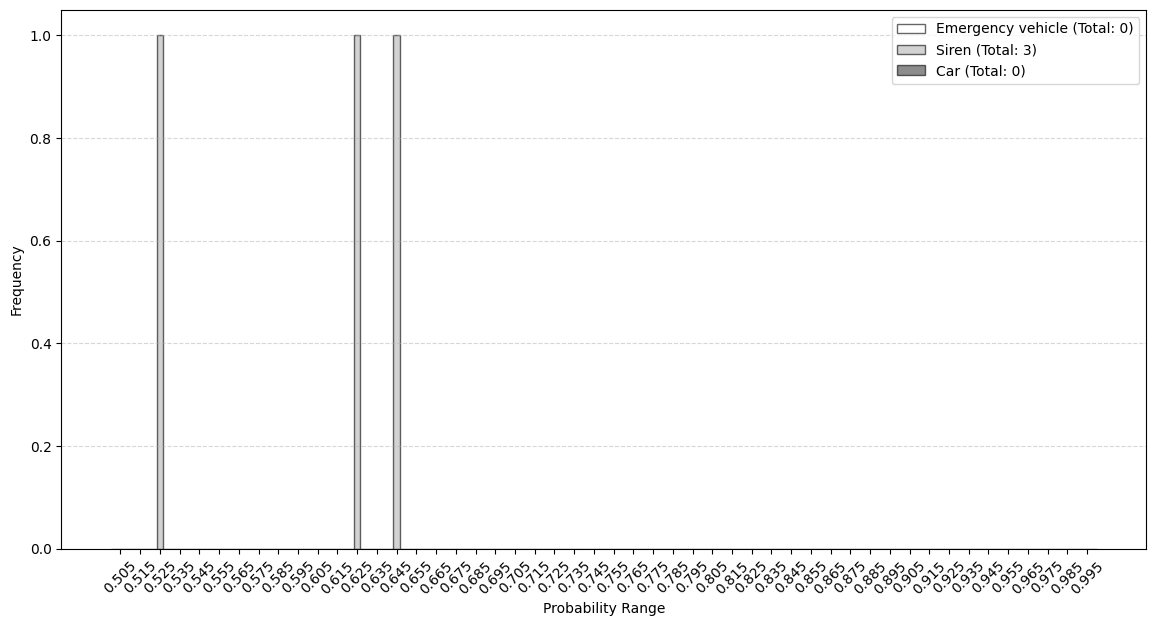

In [ ]:
plot_class_distributions(probits_df=softmax_df,
                         class_mapping_df=classes_df,
                         class_labels=['Emergency vehicle', 'Siren', 'Car'],
                         bin_size=0.01,
                         zoom_min=0.50,
                         zoom_max=1.01,
                         save_as_vector=True,
                         file_name="Neg_Vehicles_05-10_Inference_Distribution",
                         title="Negatives")

## Alarms Probabilities

Shape of the softmax matrix: (4768, 527)
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6       Class_7  \
0  0.002461  0.000010  0.000005  0.000004  0.000005  0.000008  8.340194e-07   
1  0.016458  0.000112  0.000049  0.000032  0.000037  0.000087  3.336914e-06   
2  0.001465  0.000008  0.000004  0.000044  0.000001  0.000005  3.197627e-06   
3  0.235733  0.001121  0.001154  0.001495  0.000601  0.000830  4.939316e-04   
4  0.554729  0.009390  0.000512  0.000121  0.000542  0.002974  7.321085e-05   

    Class_8   Class_9      Class_10  ...  Class_518     Class_519  Class_520  \
0  0.000009  0.000002  9.950113e-07  ...   0.000001  7.296381e-07   0.000005   
1  0.000094  0.000025  2.381070e-05  ...   0.000121  1.381891e-04   0.001230   
2  0.000003  0.000004  3.299420e-06  ...   0.000171  1.312057e-04   0.000043   
3  0.000099  0.000013  1.371090e-05  ...   0.000094  4.616754e-06   0.000151   
4  0.000867  0.000085  3.832718e-04  ...   0.000147  2.556666e-04   0.000177   

   

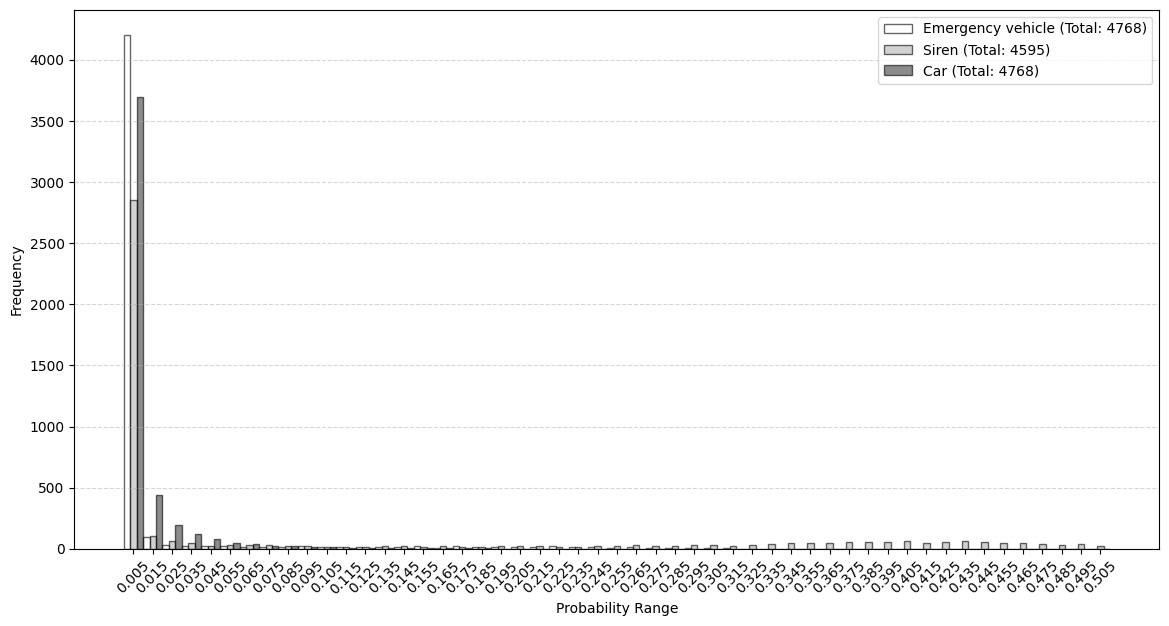

In [ ]:
data = np.load(files_path + "probs_Alarms.npz")
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

softmax_matrix = data["logits"]

softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])

plot_class_distributions(probits_df=softmax_df,
                         class_mapping_df=classes_df,
                         class_labels=['Emergency vehicle', 'Siren', 'Car'],
                         bin_size=0.01,
                         zoom_min=0.0,
                         zoom_max=0.51,
                         save_as_vector=True,
                         file_name="Neg_Alarms_0-05_Inference_Distribution",
                         title="Negatives")

Shape of the softmax matrix: (4768, 527)
    Class_1   Class_2   Class_3   Class_4   Class_5   Class_6       Class_7  \
0  0.002461  0.000010  0.000005  0.000004  0.000005  0.000008  8.340194e-07   
1  0.016458  0.000112  0.000049  0.000032  0.000037  0.000087  3.336914e-06   
2  0.001465  0.000008  0.000004  0.000044  0.000001  0.000005  3.197627e-06   
3  0.235733  0.001121  0.001154  0.001495  0.000601  0.000830  4.939316e-04   
4  0.554729  0.009390  0.000512  0.000121  0.000542  0.002974  7.321085e-05   

    Class_8   Class_9      Class_10  ...  Class_518     Class_519  Class_520  \
0  0.000009  0.000002  9.950113e-07  ...   0.000001  7.296381e-07   0.000005   
1  0.000094  0.000025  2.381070e-05  ...   0.000121  1.381891e-04   0.001230   
2  0.000003  0.000004  3.299420e-06  ...   0.000171  1.312057e-04   0.000043   
3  0.000099  0.000013  1.371090e-05  ...   0.000094  4.616754e-06   0.000151   
4  0.000867  0.000085  3.832718e-04  ...   0.000147  2.556666e-04   0.000177   

   

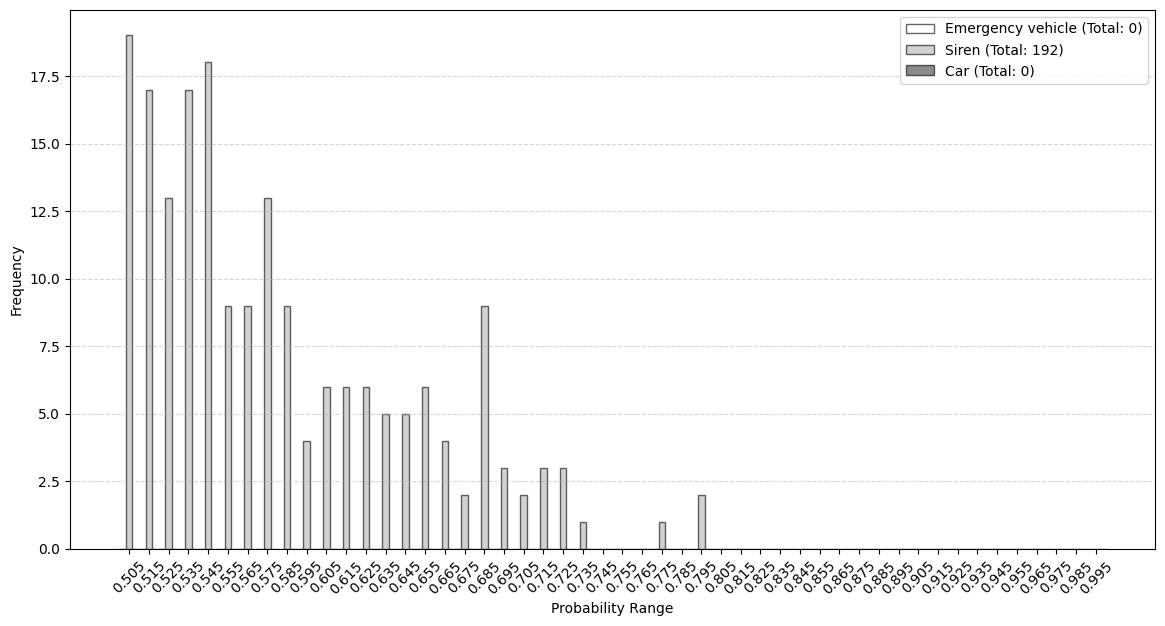

In [ ]:
plot_class_distributions(probits_df=softmax_df,
                         class_mapping_df=classes_df,
                         class_labels=['Emergency vehicle', 'Siren', 'Car'],
                         bin_size=0.01,
                         zoom_min=0.50,
                         zoom_max=1.01,
                         save_as_vector=True,
                         file_name="Neg_Alarms_05-10_Inference_Distribution",
                         title="Negatives")

# Inferences Statistical analysis

In [ ]:
# Define the number of classes for the AudioSet onthology
num_classes = 527

In [ ]:
def compute_selected_class_statistics(probits_df, class_mapping_df, selected_class_labels):
    """
    Computes detailed statistics for selected classes (given as human-readable display names).

    Args:
        probits_df (pd.DataFrame): DataFrame of probabilities (num_samples x num_classes).
        class_mapping_df (pd.DataFrame): DataFrame with columns "index", "mid", "display_name" for mapping.
        selected_class_labels (list): List of human-readable class labels to compute statistics for.

    Returns:
        pd.DataFrame: Statistics (mean, median, 25th percentile, 75th percentile, std dev, min, max)
                      for each selected class, with the first column labeled "label".
    """
    # Create a mapping from display name to class index (assumed to be 0-based)
    name_to_index = {row['display_name']: int(row['index']) for _, row in class_mapping_df.iterrows()}

    # Determine which columns to keep (e.g., "Class_1", "Class_2", etc.)
    selected_indices = []
    for label in selected_class_labels:
        if label not in name_to_index:
            raise ValueError(f"Class label '{label}' not found in the mapping dataframe.")
        selected_indices.append(name_to_index[label])

    selected_columns = [f'Class_{i+1}' for i in selected_indices]
    filtered_df = probits_df[selected_columns]

    # Compute statistics
    stats_df = pd.DataFrame({'mean': filtered_df.mean(),
                             'median': filtered_df.median(),
                             'q25': filtered_df.quantile(0.25),
                             'q75': filtered_df.quantile(0.75),
                             'std_dev': filtered_df.std(),
                             'min': filtered_df.min(),
                             'max': filtered_df.max()})

    # Add display name column (preserve the order of selected_class_labels)
    stats_df['display_name'] = selected_class_labels

    # Reorder columns to put display_name first and then rename it to "label"
    stats_df = stats_df[['display_name', 'mean', 'median', 'q25', 'q75', 'std_dev', 'min', 'max']]
    stats_df.rename(columns={'display_name': 'label'}, inplace=True)

    # Reset the index
    stats_df = stats_df.reset_index(drop=True)

    return stats_df


def plot_boxplot_for_selected_classes(probits_df, class_mapping_df, selected_class_labels,
                                        figsize=(12, 6), use_symlog=True,
                                        save_as_png=False, file_name="boxplot.png"):
    """
    Creates a vertical box plot for selected classes (given as human-readable display names),
    showing the distribution of probabilities with overlaid mean (red marker) and error bars representing
    the standard deviation. The x-axis is labeled "Classes" and the y-axis is labeled "Inference probabilities".
    The y-axis uses a symlog scale, and the tick corresponding to 10^0 is replaced with "1.0".
    Optionally, the plot is saved as a high-resolution PNG file (dpi=600).

    Args:
        probits_df (pd.DataFrame): DataFrame of probabilities (num_samples x num_classes).
        class_mapping_df (pd.DataFrame): DataFrame with columns "index", "mid", "display_name" for mapping.
        selected_class_labels (list): List of human-readable class labels to plot.
        figsize (tuple): Figure size.
        use_symlog (bool): If True, sets the y-axis to a symlog scale.
        save_as_png (bool): If True, saves the plot as a PNG file.
        file_name (str): File name for saving the plot (if save_as_png is True).

    Returns:
        None: Displays (and optionally saves) the box plot.
    """
    # Map display names to class indices (assumed to be 0-based)
    name_to_index = {row['display_name']: int(row['index']) for _, row in class_mapping_df.iterrows()}
    selected_indices = []
    for label in selected_class_labels:
        if label not in name_to_index:
            raise ValueError(f"Class label '{label}' not found in the mapping dataframe.")
        selected_indices.append(name_to_index[label])

    # Filter the probits_df to only include the selected classes
    selected_columns = [f'Class_{i+1}' for i in selected_indices]
    filtered_df = probits_df[selected_columns]

    # Melt the filtered DataFrame into long format for plotting
    melted = filtered_df.melt(var_name='class', value_name='value')
    # Extract class index from the column name (e.g., "Class_1" -> 0)
    melted['class_index'] = melted['class'].str.extract('Class_(\d+)').astype(int) - 1
    # Merge with mapping to get display names
    melted = melted.merge(class_mapping_df[['index', 'display_name']], left_on='class_index',
                          right_on='index', how='left')
    # Keep only the selected classes and preserve their order
    melted = melted[melted['display_name'].isin(selected_class_labels)]
    melted['display_name'] = pd.Categorical(melted['display_name'], categories=selected_class_labels, ordered=True)
    melted.sort_values(by='display_name', inplace=True)

    plt.figure(figsize=figsize)
    # Create a box plot (vertical) using seaborn
    ax = sns.boxplot(x='display_name', y='value', data=melted, color="0.8", width=0.6)
    ax.set_xlabel("Classes")
    ax.set_ylabel("Inference Probabilities")

    if use_symlog:
        # Use a symlog scale for y-axis to better show very low values.
        ax.set_yscale('symlog', linthresh=1e-6)
        ax.set_ylim(1e-6, 1)

        # Custom formatter: substitute tick value 1 (10^0) with "1.0"
        def y_formatter(x, pos):
            if abs(x - 1) < 1e-9:
                return "1.0"
            return f"{x:g}"
        ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Rotate the x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()

    # Save the plot as a high resolution PNG if requested
    if save_as_png:
        plt.savefig(file_name, dpi=600, bbox_inches='tight')

    plt.show()

## Emergency Vehicles set

Softmax matrix shape: (4715, 527)

Statistics for selected classes:
                             label      mean    median       q25       q75  \
0                Emergency vehicle  0.148752  0.136582  0.002808  0.276541   
1     Traffic noise, roadway noise  0.008165  0.003200  0.000808  0.007851   
2        Outside, urban or manmade  0.007252  0.004242  0.002070  0.009409   
3                        Car alarm  0.006621  0.000439  0.000113  0.001876   
4  Vehicle horn, car horn, honking  0.004681  0.000842  0.000370  0.002466   
5                            Siren  0.170511  0.160218  0.003511  0.249605   
6              Civil defense siren  0.024969  0.001230  0.000183  0.006318   
7                            Alarm  0.001683  0.000168  0.000058  0.000564   
8      Smoke detector, smoke alarm  0.000259  0.000019  0.000008  0.000056   
9                       Fire alarm  0.001504  0.000105  0.000038  0.000330   

    std_dev           min       max  
0  0.136174  1.335732e-06  0.464044

<ipython-input-56-94e533a40fd2>:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


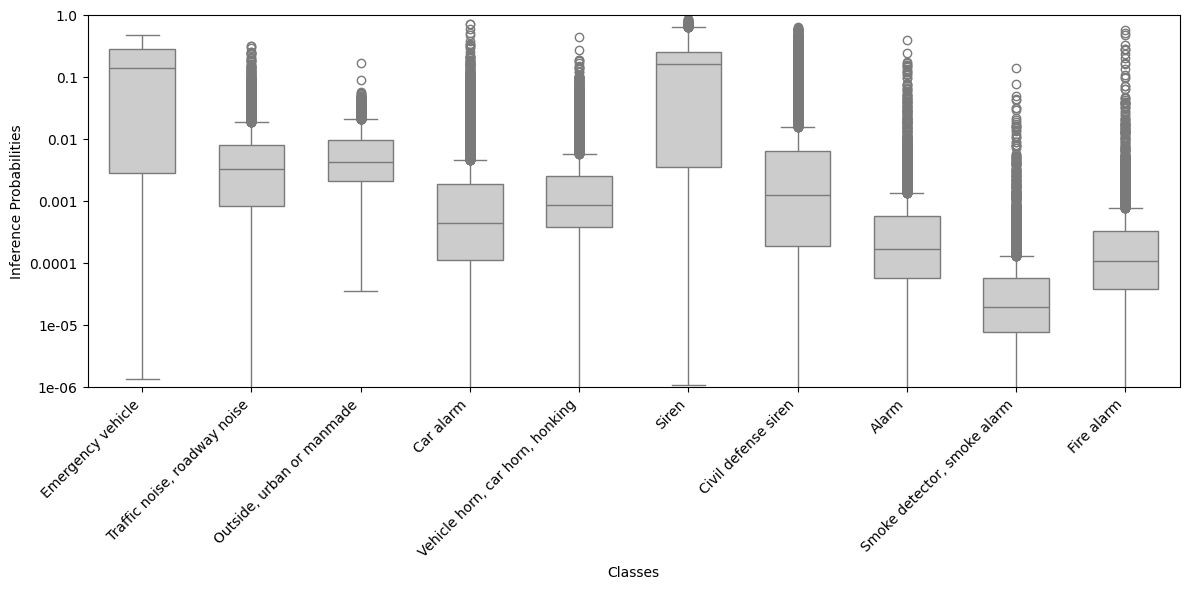

In [ ]:
softmax_matrix = np.load(files_path + "probs_Emergency_Vehicle.npz")["logits"]
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

# Convert the matrix to a pandas DataFrame with columns "Class_1", "Class_2", ..., "Class_{num_classes}"
softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])
print("Softmax matrix shape:", softmax_df.shape)
print()

# Define the selected class labels (human-readable display names)
selected_class_labels = ['Emergency vehicle',
                         'Traffic noise, roadway noise', 'Outside, urban or manmade',
                         'Car alarm', 'Vehicle horn, car horn, honking', 'Siren', 'Civil defense siren', 'Alarm', 'Smoke detector, smoke alarm', 'Fire alarm']

# Compute and print detailed statistics for the selected classes
stats_df = compute_selected_class_statistics(softmax_df, classes_df, selected_class_labels)
print("Statistics for selected classes:")
print(stats_df)
print()

# Optionally, save the statistics to CSV
stats_df.to_csv('Probs_Emergency_Vehicle_class_statistics.csv', index=False)

plot_boxplot_for_selected_classes(softmax_df,
                                  classes_df,
                                  selected_class_labels,
                                  figsize=(12, 6),
                                  use_symlog=True,
                                  save_as_png=True,
                                  file_name="Probs_Emergency_Vehicle_BoxPlot.png")

## Traffic set

Softmax matrix shape: (4855, 527)

Statistics for selected classes:
                             label      mean    median       q25       q75  \
0                Emergency vehicle  0.001854  0.000169  0.000067  0.000423   
1     Traffic noise, roadway noise  0.006047  0.000443  0.000055  0.003119   
2        Outside, urban or manmade  0.014387  0.010204  0.003911  0.019874   
3                        Car alarm  0.000400  0.000046  0.000016  0.000119   
4  Vehicle horn, car horn, honking  0.005788  0.000241  0.000089  0.000598   
5                            Siren  0.002845  0.000178  0.000081  0.000396   
6              Civil defense siren  0.000849  0.000023  0.000010  0.000059   
7                            Alarm  0.000263  0.000040  0.000017  0.000096   
8      Smoke detector, smoke alarm  0.000081  0.000015  0.000007  0.000037   
9                       Fire alarm  0.000106  0.000026  0.000013  0.000056   

    std_dev           min       max  
0  0.016866  3.333259e-07  0.361190

<ipython-input-56-94e533a40fd2>:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


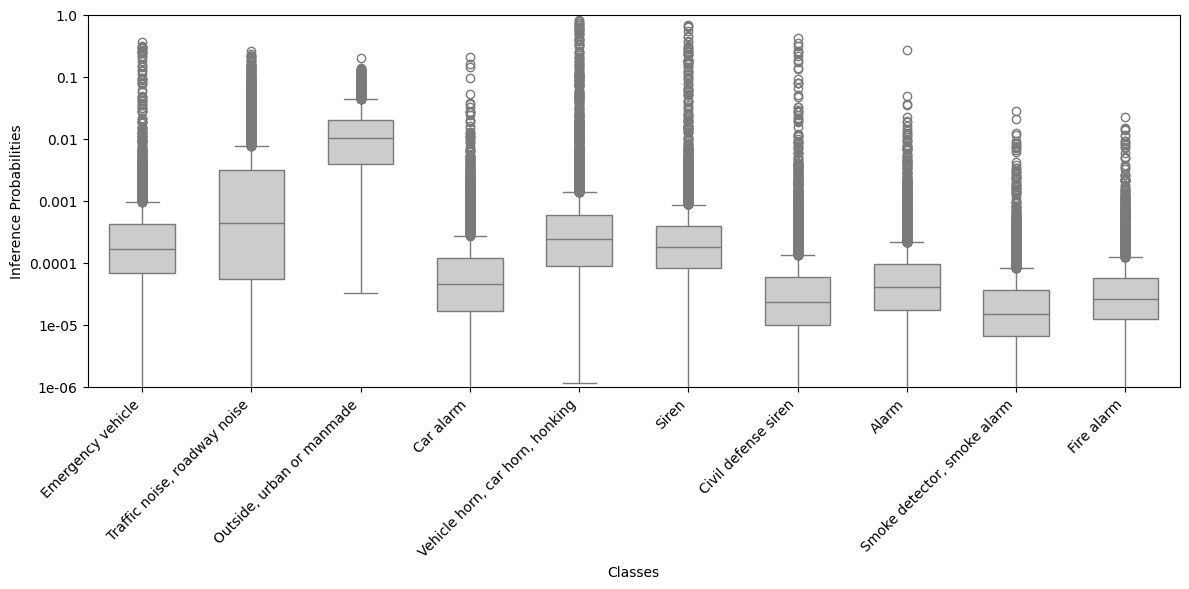

In [ ]:
softmax_matrix = np.load(files_path + "probs_Traffic.npz")["logits"]
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

# Convert the matrix to a pandas DataFrame with columns "Class_1", "Class_2", ..., "Class_{num_classes}"
softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])
print("Softmax matrix shape:", softmax_df.shape)
print()

# Define the selected class labels (human-readable display names)
selected_class_labels = ['Emergency vehicle',
                         'Traffic noise, roadway noise', 'Outside, urban or manmade',
                         'Car alarm', 'Vehicle horn, car horn, honking', 'Siren', 'Civil defense siren', 'Alarm', 'Smoke detector, smoke alarm', 'Fire alarm']

# Compute and print detailed statistics for the selected classes
stats_df = compute_selected_class_statistics(softmax_df, classes_df, selected_class_labels)
print("Statistics for selected classes:")
print(stats_df)
print()

# Optionally, save the statistics to CSV
stats_df.to_csv('Probs_Traffic_class_statistics.csv', index=False)

plot_boxplot_for_selected_classes(softmax_df,
                                  classes_df,
                                  selected_class_labels,
                                  figsize=(12, 6),
                                  use_symlog=True,
                                  save_as_png=True,
                                  file_name="Probs_Traffic_BoxPlot.png")

## Vehicles set

Softmax matrix shape: (4985, 527)

Statistics for selected classes:
                             label      mean    median       q25       q75  \
0                Emergency vehicle  0.003570  0.000287  0.000125  0.000689   
1     Traffic noise, roadway noise  0.007424  0.001676  0.000416  0.006258   
2        Outside, urban or manmade  0.014284  0.012661  0.006838  0.019610   
3                        Car alarm  0.000439  0.000055  0.000025  0.000130   
4  Vehicle horn, car horn, honking  0.002473  0.000314  0.000141  0.000645   
5                            Siren  0.003473  0.000225  0.000109  0.000469   
6              Civil defense siren  0.000784  0.000025  0.000011  0.000055   
7                            Alarm  0.000209  0.000047  0.000023  0.000098   
8      Smoke detector, smoke alarm  0.000162  0.000017  0.000008  0.000037   
9                       Fire alarm  0.000105  0.000028  0.000014  0.000056   

    std_dev           min       max  
0  0.027336  1.218769e-07  0.438932

<ipython-input-56-94e533a40fd2>:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


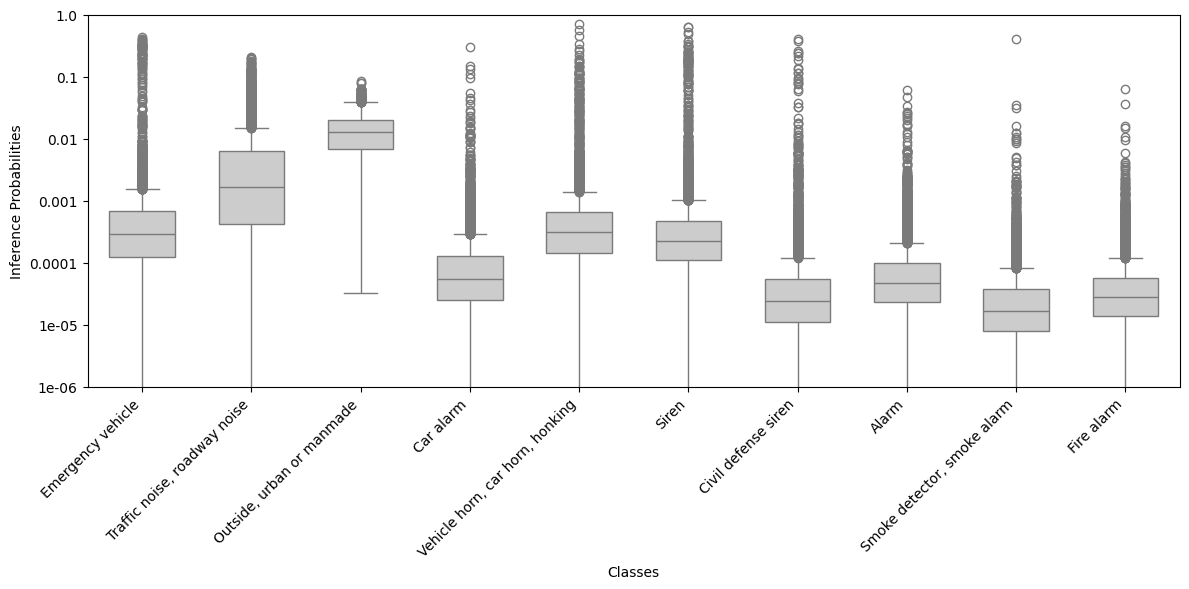

In [ ]:
softmax_matrix = np.load(files_path + "probs_Vehicles.npz")["logits"]
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

# Convert the matrix to a pandas DataFrame with columns "Class_1", "Class_2", ..., "Class_{num_classes}"
softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])
print("Softmax matrix shape:", softmax_df.shape)
print()

# Define the selected class labels (human-readable display names)
selected_class_labels = ['Emergency vehicle',
                         'Traffic noise, roadway noise', 'Outside, urban or manmade',
                         'Car alarm', 'Vehicle horn, car horn, honking', 'Siren', 'Civil defense siren', 'Alarm', 'Smoke detector, smoke alarm', 'Fire alarm']

# Compute and print detailed statistics for the selected classes
stats_df = compute_selected_class_statistics(softmax_df, classes_df, selected_class_labels)
print("Statistics for selected classes:")
print(stats_df)
print()

# Optionally, save the statistics to CSV
stats_df.to_csv('Probs_Vehicles_class_statistics.csv', index=False)

plot_boxplot_for_selected_classes(softmax_df,
                                  classes_df,
                                  selected_class_labels,
                                  figsize=(12, 6),
                                  use_symlog=True,
                                  save_as_png=True,
                                  file_name="Probs_Vehicles_BoxPlot.png")

## Alarms set

Softmax matrix shape: (4768, 527)

Statistics for selected classes:
                             label      mean    median       q25       q75  \
0                Emergency vehicle  0.015442  0.000381  0.000099  0.001524   
1     Traffic noise, roadway noise  0.002114  0.000144  0.000028  0.000774   
2        Outside, urban or manmade  0.008596  0.002578  0.000650  0.011204   
3                        Car alarm  0.010495  0.000105  0.000039  0.000515   
4  Vehicle horn, car horn, honking  0.064490  0.001030  0.000213  0.011332   
5                            Siren  0.124022  0.001633  0.000217  0.272622   
6              Civil defense siren  0.107321  0.000272  0.000028  0.070069   
7                            Alarm  0.011933  0.000203  0.000067  0.001117   
8      Smoke detector, smoke alarm  0.004457  0.000041  0.000014  0.000187   
9                       Fire alarm  0.015178  0.000066  0.000018  0.000436   

    std_dev           min       max  
0  0.050881  6.515917e-07  0.410806

<ipython-input-56-94e533a40fd2>:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


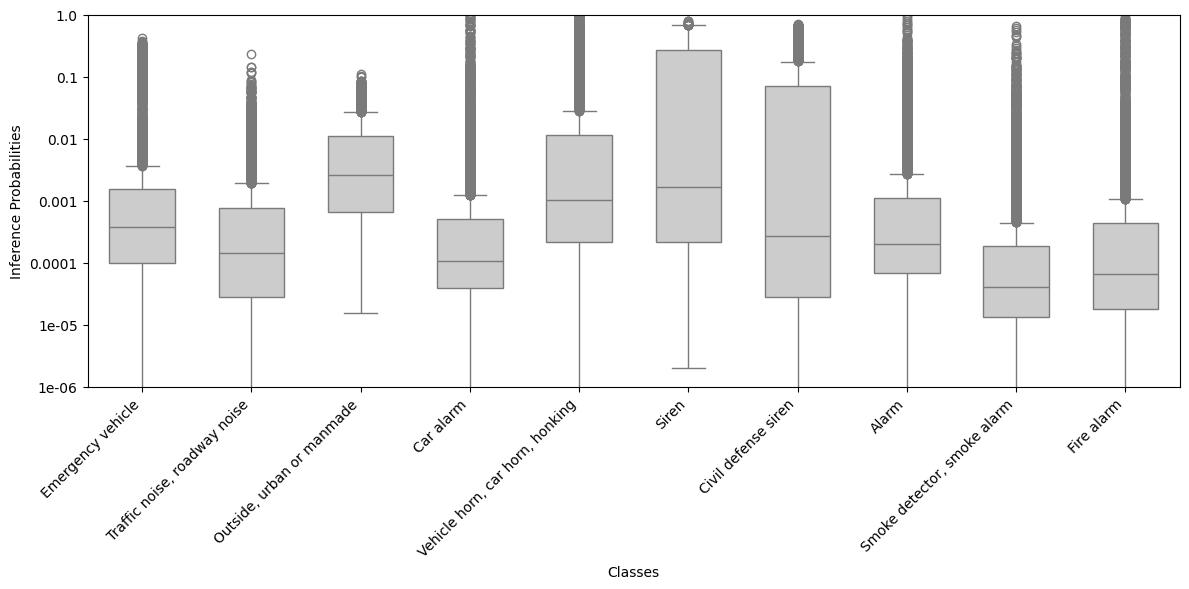

In [ ]:
softmax_matrix = np.load(files_path + "probs_Alarms.npz")["logits"]
classes_df = pd.read_csv(files_path + 'class_labels_indices.csv')

# Convert the matrix to a pandas DataFrame with columns "Class_1", "Class_2", ..., "Class_{num_classes}"
softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])
print("Softmax matrix shape:", softmax_df.shape)
print()

# Define the selected class labels (human-readable display names)
selected_class_labels = ['Emergency vehicle',
                         'Traffic noise, roadway noise', 'Outside, urban or manmade',
                         'Car alarm', 'Vehicle horn, car horn, honking', 'Siren', 'Civil defense siren', 'Alarm', 'Smoke detector, smoke alarm', 'Fire alarm']

# Compute and print detailed statistics for the selected classes
stats_df = compute_selected_class_statistics(softmax_df, classes_df, selected_class_labels)
print("Statistics for selected classes:")
print(stats_df)
print()

# Optionally, save the statistics to CSV
stats_df.to_csv('Probs_Alarms_class_statistics.csv', index=False)

plot_boxplot_for_selected_classes(softmax_df,
                                  classes_df,
                                  selected_class_labels,
                                  figsize=(12, 6),
                                  use_symlog=True,
                                  save_as_png=True,
                                  file_name="Probs_Alarms_BoxPlot.png")

# Backup Scripts

In [ ]:
import pandas as pd

# Load the three CSV files
alarms_df = pd.read_csv('ULFP_in_Alarms.csv')
traffic_df = pd.read_csv('ULFP_in_Traffic.csv')
vehicles_df = pd.read_csv('ULFP_in_Vehicles.csv')

# Merge the dataframes by 'mid', adding suffixes to distinguish their frequencies
merged_df = alarms_df.merge(traffic_df, on=['mid', 'display_name'], how='outer', suffixes=('_alarms', '_traffic'))
merged_df = merged_df.merge(vehicles_df, on=['mid', 'display_name'], how='outer', suffixes=('', '_vehicles'))

# Fill NaN values with 0 for frequency columns
merged_df['frequency_alarms'].fillna(0, inplace=True)
merged_df['frequency_traffic'].fillna(0, inplace=True)
merged_df['frequency'].fillna(0, inplace=True)  # This column is the frequency from vehicles

# Rename the 'frequency' column from the vehicles dataset
merged_df.rename(columns={'frequency': 'frequency_vehicles'}, inplace=True)

# Calculate the total frequency for each 'mid'
merged_df['total_frequency'] = merged_df['frequency_alarms'] + merged_df['frequency_traffic'] + merged_df['frequency_vehicles']

# Sort by total frequency in descending order
merged_df = merged_df.sort_values(by='total_frequency', ascending=False)

# Save the combined results to a CSV file
merged_df.to_csv('ULFP_merged.csv', index=False)

# Display the merged DataFrame
print("Merged DataFrame with total frequencies:")
print(merged_df.head())


Merged DataFrame with total frequencies:
            mid  frequency_alarms                     display_name  \
151    /m/09x0r             856.0                           Speech   
141    /m/07yv9             711.0                          Vehicle   
57    /m/03kmc9            1603.0                            Siren   
192  /t/dd00128             341.0        Outside, urban or manmade   
147   /m/0912c9            1230.0  Vehicle horn, car horn, honking   

     frequency_traffic  frequency_vehicles  total_frequency  
151              766.0               317.0           1939.0  
141              439.0               626.0           1776.0  
57                 1.0                 1.0           1605.0  
192             1225.0                22.0           1588.0  
147               36.0                 2.0           1268.0  


<ipython-input-61-1102922714f5>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['frequency_alarms'].fillna(0, inplace=True)
<ipython-input-61-1102922714f5>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
def select_samples(
    probits_df,
    sample_paths_df,
    dataset_name,
    prob_min,
    prob_max,
    num_samples,
    file_name,
    class1_index,
    class2_index
):
    """
    Selects a random set of samples within a specified probit range and appends the results to a CSV file.

    Args:
        probits_df (pd.DataFrame): A dataframe containing the probits for each class (num_samples x num_classes).
        sample_paths_df (pd.DataFrame): A dataframe containing the full paths of the samples with suffix "_Original.wav".
        dataset_name (str): The name of the dataset to be reported in the output file.
        prob_min (float): The lower bound of the probit interval to be considered.
        prob_max (float): The upper bound of the probit interval to be considered.
        num_samples (int): The number of samples to extract.
        file_name (str): The filename where the output must be written.
        class1_index (int): The column index of the first class to consider.
        class2_index (int): The column index of the second class to consider.

    Returns:
        None
    """
    # Handle header issue in probits_df if necessary
    if probits_df.shape[0] > sample_paths_df.shape[0]:
        print("Header mismatch detected! Adjusting probits_df to align with sample_paths_df.")
        probits_df = probits_df.iloc[1:]  # Drop the first row if misaligned
        probits_df.reset_index(drop=True, inplace=True)

    # Ensure both DataFrames are aligned
    probits_df = probits_df.reset_index(drop=True)
    sample_paths_df = sample_paths_df.reset_index(drop=True)

    # Filter samples within the specified probit range for the first class
    selected_samples = probits_df[
        (probits_df.iloc[:, class1_index] >= prob_min) &
        (probits_df.iloc[:, class1_index] <= prob_max)
    ]


    # If fewer samples are available than requested, take all
    if selected_samples.shape[0] < num_samples:
        print(f"Only {selected_samples.shape[0]} samples available in the specified probit range.")
        num_samples = selected_samples.shape[0]

    # Randomly select the desired number of samples
    # selected_samples = selected_samples.sample(n=num_samples).reset_index(drop=True)
    selected_samples = selected_samples.sample(n=num_samples)


    # Extract YouTube IDs from sample paths
    sample_paths_df['yt_id'] = sample_paths_df.iloc[:, 0].apply(lambda x: x.split('/')[-1].replace('_Original.wav', ''))
    selected_samples['yt_id'] = sample_paths_df['yt_id'].iloc[selected_samples.index]


    # Create the output DataFrame
    output_df = pd.DataFrame({
        'yt_id': selected_samples['yt_id'],
        'dataset_name': dataset_name,
        f'inf_probability[{class1_index}]': selected_samples.iloc[:, class1_index],
        f'inf_probability[{class2_index}]': selected_samples.iloc[:, class2_index]
    })

    # Append to the output CSV file
    if not pd.io.common.file_exists(file_name):
        output_df.to_csv(file_name, index=False)
    else:
        output_df.to_csv(file_name, mode='a', header=False, index=False)

    print(f"Appended {num_samples} samples to {file_name}.")


In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import Counter

num_classes = 527   # Number of classes in the e-panns ontology

# softmax_matrix = np.load("logits_Emergency_Vehicle.npz")["logits"]
# sample_paths_df = pd.read_csv('Emergency_Vehicle_read_paths.csv', header=None)
# softmax_matrix = np.load("logits_Traffic.npz")["logits"]
# sample_paths_df = pd.read_csv('Traffic_read_paths.csv', header=None)
# softmax_matrix = np.load("logits_Alarms.npz")["logits"]
# sample_paths_df = pd.read_csv('Alarms_read_paths.csv', header=None)
softmax_matrix = np.load("logits_Vehicles.npz")["logits"]
sample_paths_df = pd.read_csv('Vehicles_read_paths.csv', header=None)


# classes_df = pd.read_csv('class_labels_indices.csv')
# positive_labels_df = pd.read_csv('True_Positives.csv')

# Convert to a pandas DataFrame for easier handling and display
softmax_df = pd.DataFrame(softmax_matrix, columns=[f'Class_{i+1}' for i in range(num_classes)])

print(softmax_df.shape)
# print(softmax_df.head(10))
print(sample_paths_df.shape)

(4985, 527)
(4986, 1)


In [ ]:
select_samples(
    probits_df=softmax_df,
    #classes_df=classes_df,
    sample_paths_df=sample_paths_df,
    dataset_name="Vehicle",
    prob_min=0.51,
    prob_max=1.0,
    num_samples=5,
    file_name="selected_samples.csv",
    class1_index=322,  # Index of the first class
    class2_index=300   # Index of the second class
)


selected samples after probits selection: (754, 527)
selected samples after random sampling: (5, 527)
Appended 5 samples to selected_samples.csv.
